<a href="https://colab.research.google.com/github/sononesupriya1993/Machhine_learning/blob/main/Multiclass_classi_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification With Keras

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train_mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## Separate X and Y

In [ ]:
X = df.drop(columns=['price_range'])

In [ ]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
Y = df[['price_range']]

In [ ]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


<Axes: xlabel='price_range'>

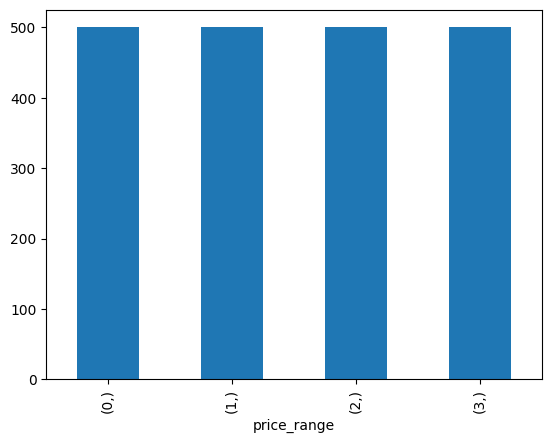

In [ ]:
Y.value_counts().plot(kind='bar')

## Perform Preprocessing for X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.shape

(1600, 20)

In [ ]:
xtest.shape

(400, 20)

In [ ]:
ytrain.shape

(1600, 1)

In [ ]:
ytest.shape

(400, 1)

## One Hot encode target features in train and test

In [ ]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [ ]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [ ]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


## Start Building the Neural Netwrok

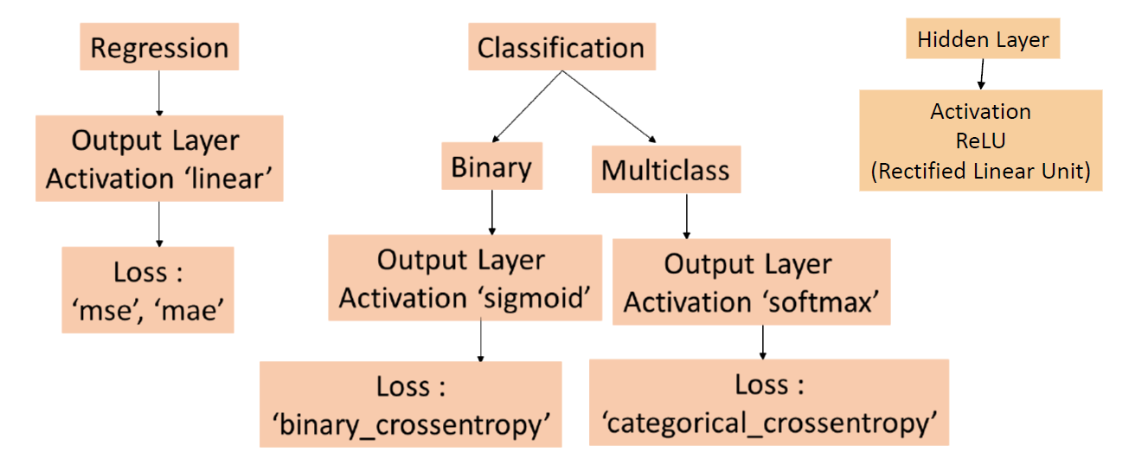

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
# Initialize the Model
model = Sequential()

# Create Input Layer
model.add(Input(shape=(xtrain.shape[1],)))
# Dense Layer 1
model.add(Dense(units=64, activation='relu'))
# Dropout Layer 1
model.add(Dropout(rate=0.3))
# Dense Layer 2
model.add(Dense(units=32, activation='relu'))
# Dropout Layer 2
model.add(Dropout(rate=0.2))
# Output Layer (Number of classes are 4 hence output layer should have 4 neurons)
model.add(Dense(units=4, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200, callbacks=[es])

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 1.4359 - accuracy: 0.2914 - val_loss: 1.3274 - val_accuracy: 0.4031
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 1.3159 - accuracy: 0.3734 - val_loss: 1.2224 - val_accuracy: 0.5125
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 1.1806 - accuracy: 0.4617 - val_loss: 1.0802 - val_accuracy: 0.5500
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 1.0551 - accuracy: 0.5266 - val_loss: 0.9196 - val_accuracy: 0.6156
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.8922 - accuracy: 0.6016 - val_loss: 0.7744 - val_accuracy: 0.7000
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7789 - accuracy: 0.6656 - val_loss: 0.6683 - val_accuracy: 0.7750
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.6852 - val_loss: 0.5938 - val_accuracy: 0.8000
Epoch 8/200
4

## Plot the Learning Curve

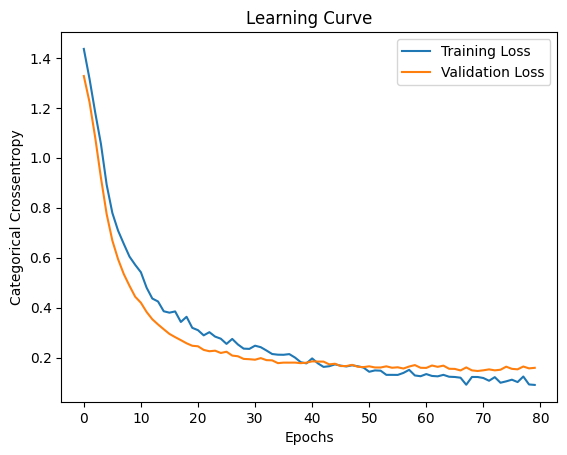

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Evaluate The Model

In [ ]:
model.evaluate(xtrain, ytrain_cat)

50/50 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9837


[0.051101356744766235, 0.9837499856948853]

In [ ]:
model.evaluate(xtest, ytest_cat)

13/13 [==============================] - 0s 6ms/step - loss: 0.1670 - accuracy: 0.9225


[0.16698019206523895, 0.9225000143051147]

## Getting Probability for Train and Test

In [ ]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

13/13 [==============================] - 0s 3ms/step


In [ ]:
yprob_tr[0:5]

array([[3.39170896e-08, 9.47953403e-01, 5.20466119e-02, 5.72148370e-11],
       [2.65921273e-34, 1.22807933e-07, 8.84692132e-01, 1.15307674e-01],
       [9.77912843e-01, 2.20872387e-02, 9.72009279e-11, 8.68613119e-31],
       [7.11516766e-34, 6.21814822e-09, 4.81162369e-02, 9.51883733e-01],
       [2.84151847e-05, 9.96186912e-01, 3.78471543e-03, 1.13805341e-13]],
      dtype=float32)

In [ ]:
yprob_ts[0:5]

array([[9.9236363e-01, 7.6363827e-03, 1.3794085e-12, 1.7133957e-37],
       [7.5139128e-16, 3.7472788e-03, 9.9624848e-01, 4.2217557e-06],
       [1.5812520e-03, 9.9833995e-01, 7.8771111e-05, 3.1180110e-19],
       [0.0000000e+00, 1.8325945e-13, 2.6326852e-03, 9.9736726e-01],
       [1.3541315e-07, 9.9518812e-01, 4.8117768e-03, 1.9527681e-13]],
      dtype=float32)

## Predicting the Class

In [ ]:
import numpy as np
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [ ]:
ypred_tr[0:5]

array([1, 2, 0, 3, 1])

In [ ]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [ ]:
ypred_ts[0:5]

array([0, 2, 1, 3, 1])

In [ ]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


## Create A Confusion Matrix for Test

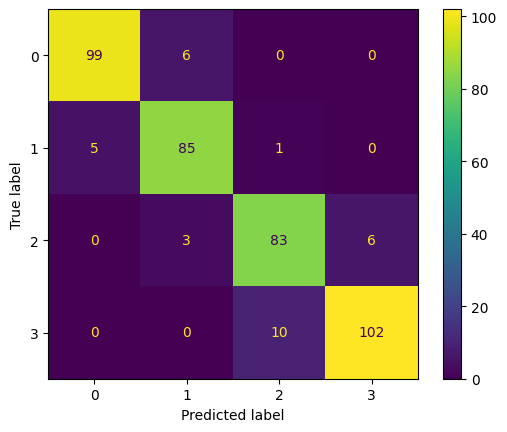

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.90      0.93      0.92        91
           2       0.88      0.90      0.89        92
           3       0.94      0.91      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



## Above model is good model because f1_macro is 0.93 > 0.8

## Load Out Of Sample Data

In [ ]:
xnew = pd.read_csv('/content/test_mobile.csv')
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


## Apply pre.transform on xnew

In [ ]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


## Get The Probabilites

In [ ]:
yprob = model.predict(xnew_pre)

32/32 [==============================] - 0s 3ms/step


In [ ]:
yprob[0:5]

array([[1.2303275e-31, 3.3163573e-07, 6.7187667e-01, 3.2812300e-01],
       [0.0000000e+00, 8.0638196e-12, 1.1785393e-02, 9.8821455e-01],
       [1.4442819e-28, 3.1550346e-06, 7.9423124e-01, 2.0576571e-01],
       [0.0000000e+00, 3.6461846e-15, 5.7656062e-04, 9.9942338e-01],
       [6.8844834e-05, 9.9879336e-01, 1.1379322e-03, 8.4498820e-13]],
      dtype=float32)

## Get Predictions

In [ ]:
ypred = np.argmax(yprob, axis=1)
ypred

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 3, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 0, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 3, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       0, 2, 0, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
max_probs = np.max(yprob, axis=1)
max_probs[0:5]

array([0.67187667, 0.98821455, 0.79423124, 0.9994234 , 0.99879336],
      dtype=float32)

## Saving above results to dataframe

In [ ]:
df_final = xnew[['id']]
df_final

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [ ]:
df_final['price_range'] = ypred
df_final['Probability'] = max_probs

In [ ]:
df_final

,id,price_range,Probability
0,1,2,0.671877
1,2,3,0.988215
2,3,2,0.794231
3,4,3,0.999423
4,5,1,0.998793
...,...,...,...
995,996,2,0.985284
996,997,1,0.999794
997,998,0,0.923795
998,999,2,0.984791


In [ ]:
df_final['price_range'].value_counts()

2    262
0    261
3    253
1    224
Name: price_range, dtype: int64

## Save above to results.csv

In [ ]:
df_final.to_csv('Results.csv', index=False)

## Save the model for future predictions

In [ ]:
model.save('MobilePriceRange.keras')

## Loading model

In [ ]:
from keras.models import load_model
nn = load_model('/content/MobilePriceRange.keras')

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
